<a href="https://colab.research.google.com/github/hardikcode-creator/EDA/blob/main/EDA_practise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [8]:
df['Reviews'].str.isnumeric().sum()

10840

In [9]:
#hence only one value in Reviews in non numeric
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df_copy=df.copy()
df_copy=df_copy.drop(df_copy.index[10472])

In [11]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [13]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')

In [16]:
df_copy['Size']=df_copy['Size'].str.replace('Varies with device',str(np.nan))

In [17]:
df_copy['Size']=df_copy['Size'].astype(float)

In [19]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [24]:
chars_to_remove=['$',',','+']
cols=['Price','Installs']
for item in chars_to_remove:
    for col in cols:
        df_copy[col]=df_copy[col].str.replace(item,'')
for col in cols:
  df_copy[col]=df_copy[col].astype(float)

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [26]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [28]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Last Updated']

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20
...,...
10836,2017-07-25
10837,2018-07-06
10838,2017-01-20
10839,2015-01-19


In [29]:
df_copy['Last Updated_month']=df_copy['Last Updated'].dt.month
df_copy['Last Updated_year']=df_copy['Last Updated'].dt.year
df_copy['Last Updated_day']=df_copy['Last Updated'].dt.day

In [31]:
df_copy.drop(columns=['Last Updated'], axis=1, inplace=True)

In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10840 non-null  object 
 1   Category            10840 non-null  object 
 2   Rating              9366 non-null   float64
 3   Reviews             10840 non-null  int64  
 4   Size                9145 non-null   float64
 5   Installs            10840 non-null  float64
 6   Type                10839 non-null  object 
 7   Price               10840 non-null  float64
 8   Content Rating      10840 non-null  object 
 9   Genres              10840 non-null  object 
 10  Current Ver         10832 non-null  object 
 11  Android Ver         10838 non-null  object 
 12  Last Updated_month  10840 non-null  int32  
 13  Last Updated_year   10840 non-null  int32  
 14  Last Updated_day    10840 non-null  int32  
dtypes: float64(4), int32(3), int64(1), object(7)
memory usage:

In [34]:
# converting categorical values to numerical
# deleting duplicate records in App section
df_copy.drop_duplicates(subset=['App'],keep='first', inplace=True)

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 9659 non-null   object 
 1   Category            9659 non-null   object 
 2   Rating              8196 non-null   float64
 3   Reviews             9659 non-null   int64  
 4   Size                8432 non-null   float64
 5   Installs            9659 non-null   float64
 6   Type                9658 non-null   object 
 7   Price               9659 non-null   float64
 8   Content Rating      9659 non-null   object 
 9   Genres              9659 non-null   object 
 10  Current Ver         9651 non-null   object 
 11  Android Ver         9657 non-null   object 
 12  Last Updated_month  9659 non-null   int32  
 13  Last Updated_year   9659 non-null   int32  
 14  Last Updated_day    9659 non-null   int32  
dtypes: float64(4), int32(3), int64(1), object(7)
memory usage: 

In [36]:
numerical_cols=[col for col in df_copy.columns if df_copy[col].dtype!='O']
categorical_cols=[col for col in df_copy.columns if df_copy[col].dtype=='O']
print(f'Categorical columns are {categorical_cols}')

Categorical columns are ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [39]:
for col in categorical_cols:
    print(df_copy[col].value_counts(normalize=True)*100)
    print("-----------------------------------------")

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
-----------------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE         

<ipython-input-43-62ee4c4a350e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_copy,x=df_copy[numerical_cols[i]], shade=True, color='red')
<ipython-input-43-62ee4c4a350e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_copy,x=df_copy[numerical_cols[i]], shade=True, color='red')
<ipython-input-43-62ee4c4a350e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_copy,x=df_copy[numerical_cols[i]], shade=True, color='red')
<ipython-input-43-62ee4c4a350e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update yo

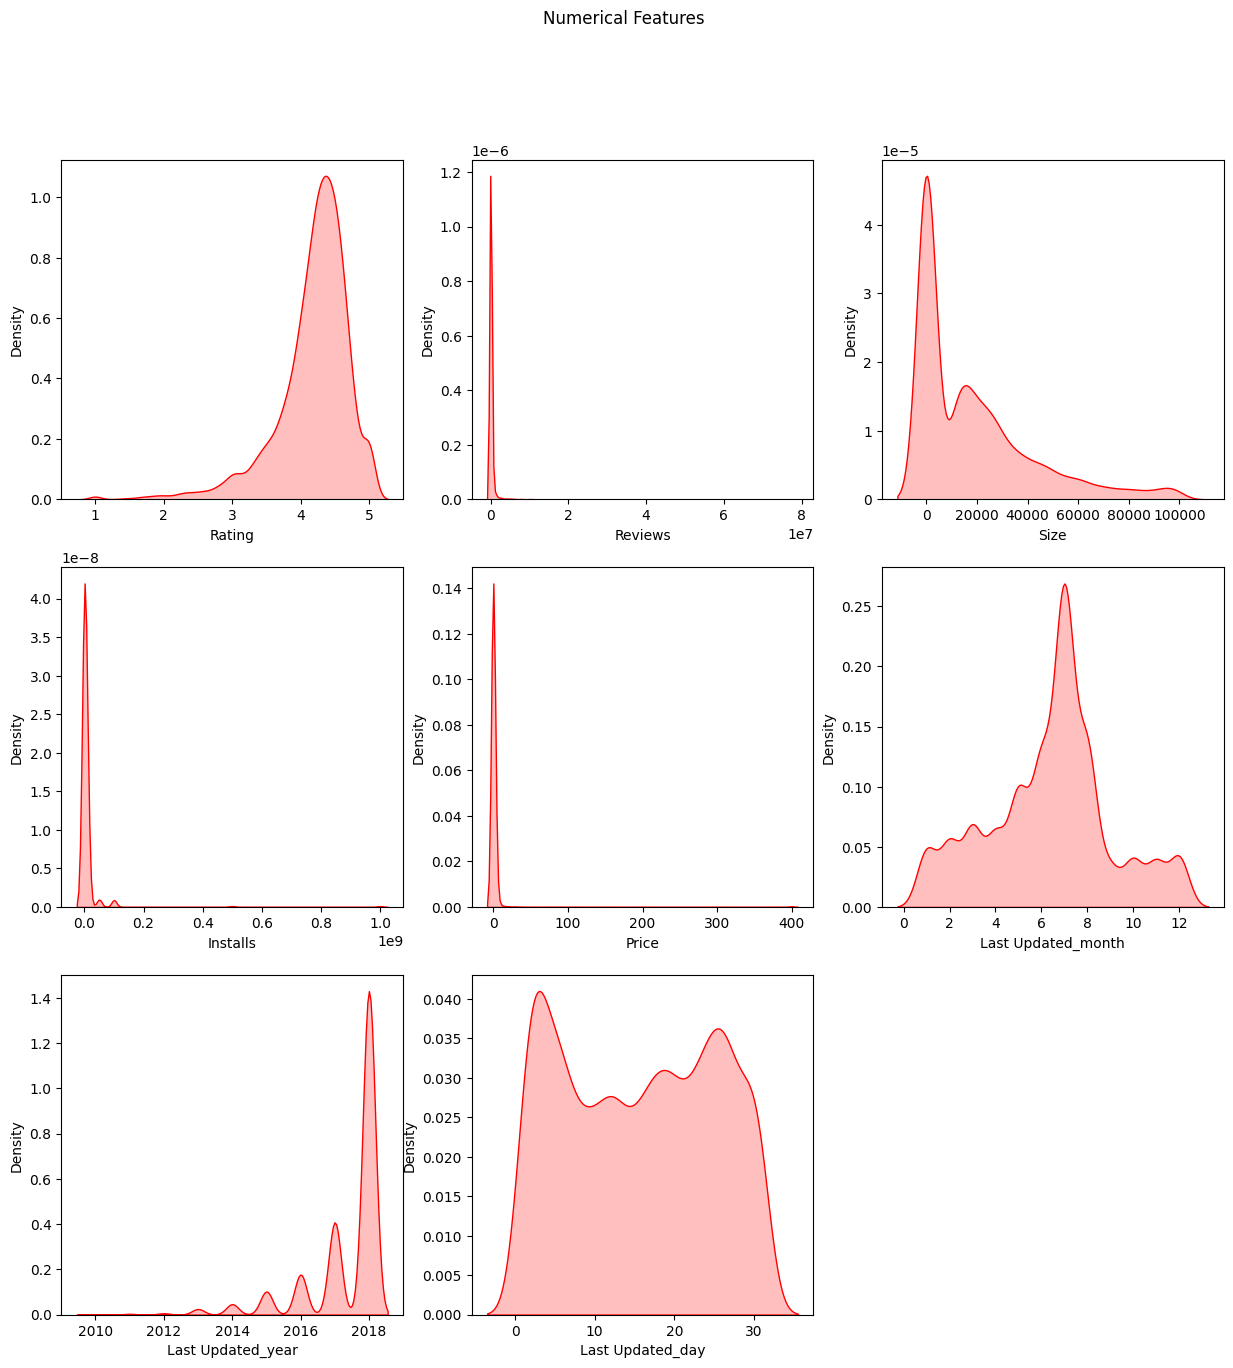

In [43]:
plt.figure(figsize=(15,15))
plt.suptitle("Numerical Features")
for i in range(len(numerical_cols)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df_copy,x=df_copy[numerical_cols[i]], shade=True, color='red')